In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv


In [ ]:
import pandas as pd

column_names = ['Index', 'ID', 'DateTime', 'Query', 'Username', 'Text']

try:
    # Try reading the file with a different encoding
    data = pd.read_csv('sentiment140.csv', engine='python', on_bad_lines='skip', header=None, names=column_names, encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print(f"Error reading file: {e}")

# Assuming reading succeeds, drop the columns you don't need
data = data.drop(['ID', 'DateTime', 'Query', 'Username'], axis=1)

#print(data.head())


In [ ]:
data.shape

(1600000, 2)

In [ ]:
data.head()

,Index,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Data Cleaning

We used the following dictionary to remove emojis <br>
https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py

In [ ]:
from emo_unicode import EMOTICONS

In [ ]:
import re

def removeLinks(text):
    text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
    return text

def removeHTMLTags(text):
    text = re.sub(r'<.*?>', '', text, flags=re.MULTILINE)
    return text

def convertToLowerCase(text):
    return text.lower()

def removeWordsWithNumbers(text):
    return re.sub(r'\S*\d\S*', '', text).strip()

def removePuctuations(text):
    return re.sub(r'[^A-Za-z0-9]+', ' ', text)

def removeWhiteSpaces(text):
    return text.strip()

def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [ ]:
def clean_data(text):

    text = str(text)
    text = removeLinks(text)
    text = removeHTMLTags(text)
    text = convertToLowerCase(text)
    text = removeWordsWithNumbers(text)
    text = removeWhiteSpaces(text)
    text = decontracted(text)
    text = removePuctuations(text)
    text = remove_emoji(text)
    text = remove_emoticons(text)
    text = text.strip()

    return text

In [ ]:
cleaned_data = data.dropna(how='any', axis=0)
cleaned_data.shape

(1600000, 2)

In [ ]:
cleaned_data['Text'] = cleaned_data['Text'].apply(clean_data)

In [ ]:
cleaned_data.shape

(1600000, 2)

In [ ]:
data['Text'].iloc[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
cleaned_data['Text'].iloc[0]

'switchfoot awww that is a bummer you shoulda got david carr of third day to do it d'

# EDA

In [ ]:
cleaned_data['Index'].value_counts()

Index
0    800000
4    800000
Name: count, dtype: int64

<Axes: xlabel='Index', ylabel='count'>

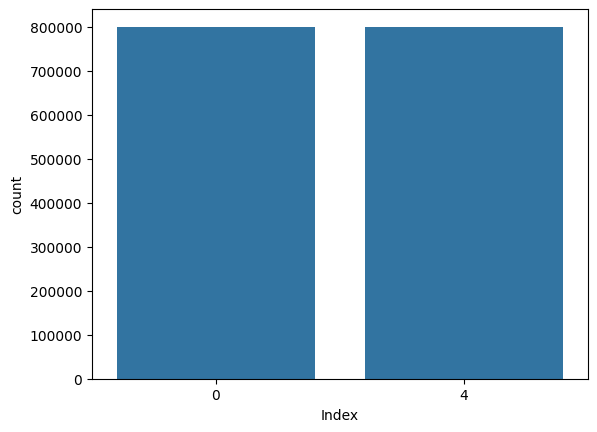

In [ ]:
sns.countplot(x='Index', data=cleaned_data)

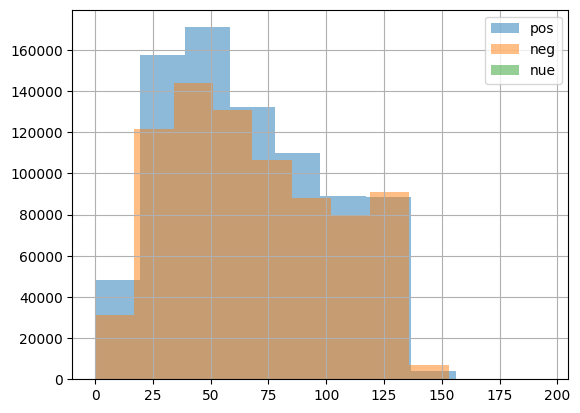

In [ ]:
cleaned_data.loc[cleaned_data['Index'] == 4, 'Text'].str.len().hist(label='pos', alpha=.5)
cleaned_data.loc[cleaned_data['Index'] == 0, 'Text'].str.len().hist(label='neg', alpha=.5)
cleaned_data.loc[cleaned_data['Index'] == 2, 'Text'].str.len().hist(label='nue', alpha=.5)
plt.legend()

Length is not a good differentiator

In [ ]:
cleaned_data.to_csv('final_data.csv', index=None)